In [1]:
import pandas as pd
from prophet import Prophet
from datetime import datetime

/Users/volthai7us/Desktop/Dev/ai/computational-finance/price_prediction/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
# python version
import sys
print(sys.version)

3.8.0 (v3.8.0:fa919fdf25, Oct 14 2019, 10:23:27) 
[Clang 6.0 (clang-600.0.57)]


In [3]:
df = pd.read_csv('../data/1month.csv')
df.columns = ['open_time', 'open_price', 'high_price', 'low_price', 'close_price', 'volume', 'close_time']
df['open_time'] = pd.to_datetime(df['open_time'] * 1000, unit='ms')
df['close_time'] = pd.to_datetime(df['close_time'], unit='ms')
df.head()

,open_time,open_price,high_price,low_price,close_price,volume,close_time
0,2017-09-01,386.44,394.39,192.00,304.36,1.679371e+05,2017-09-30 23:59:59.999
1,2017-10-01,305.13,354.00,272.20,304.90,2.311378e+05,2017-10-31 23:59:59.999
2,2017-11-01,304.89,515.00,274.73,427.43,5.581401e+05,2017-11-30 23:59:59.999
3,2017-12-01,428.05,864.90,375.01,733.98,1.709681e+06,2017-12-31 23:59:59.999
4,2018-01-01,733.01,1440.00,716.80,1124.81,4.449875e+06,2018-01-31 23:59:59.999


In [4]:
prophet_df = df[['open_time', 'close_price']]
prophet_df.columns = ['ds', 'y']
prophet_df.head()


,ds,y
0,2017-09-01,304.36
1,2017-10-01,304.90
2,2017-11-01,427.43
3,2017-12-01,733.98
4,2018-01-01,1124.81


In [5]:
prophet = Prophet()
prophet.fit(prophet_df)

14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:34 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
future = prophet.make_future_dataframe(periods=30)
future.tail()


,ds
93,2023-04-27
94,2023-04-28
95,2023-04-29
96,2023-04-30
97,2023-05-01


In [7]:
prophet_forecast = prophet.predict(future)
prophet_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
93,2023-04-27,2502.978655,1293.013983,3611.717219
94,2023-04-28,2515.153341,1394.058478,3666.552726
95,2023-04-29,2517.462485,1391.303693,3678.721594
96,2023-04-30,2508.197212,1411.713973,3738.396956
97,2023-05-01,2486.077389,1278.523263,3598.982390


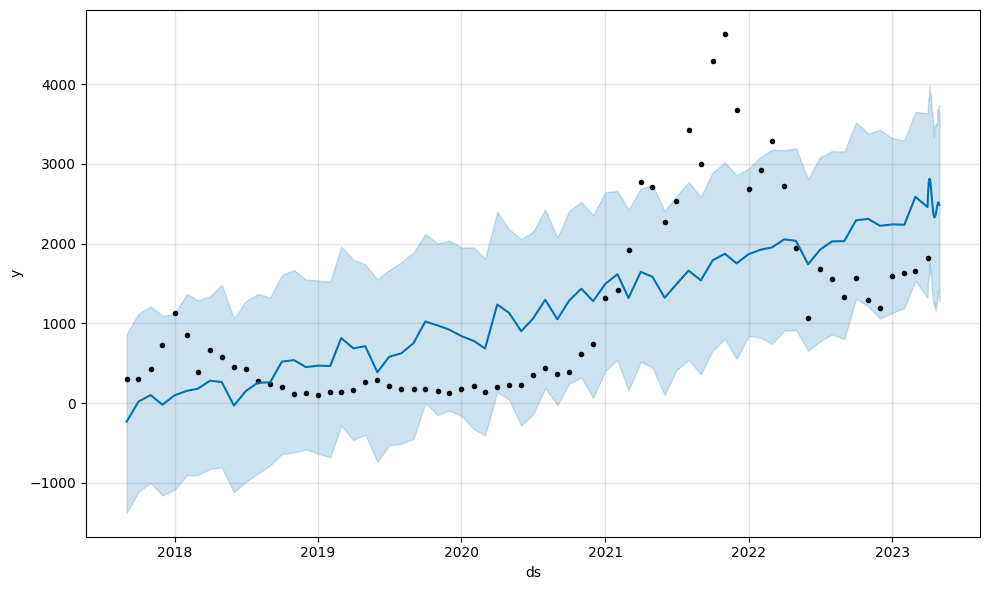

In [8]:
fig1 = prophet.plot(prophet_forecast)


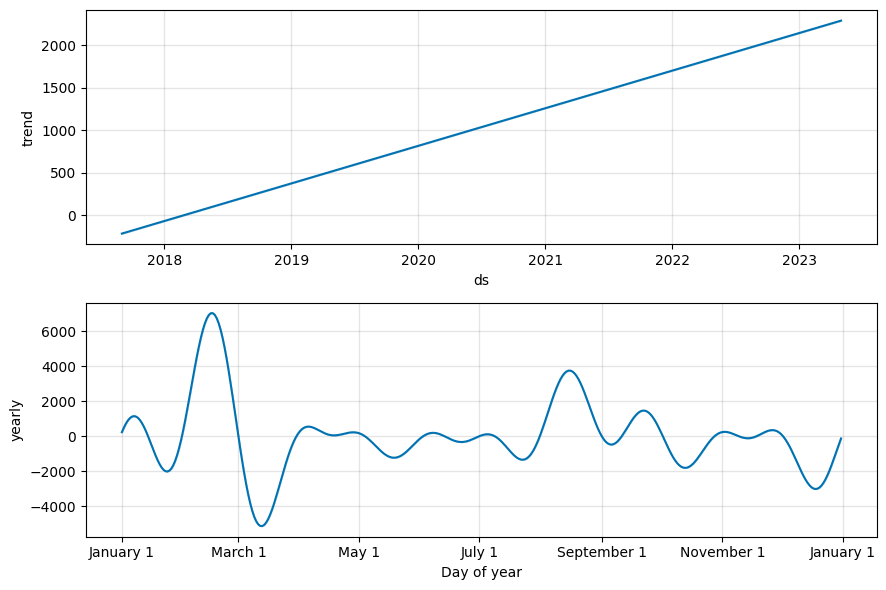

In [9]:
fig2 = prophet.plot_components(prophet_forecast)

In [10]:
import matplotlib.pyplot as plt

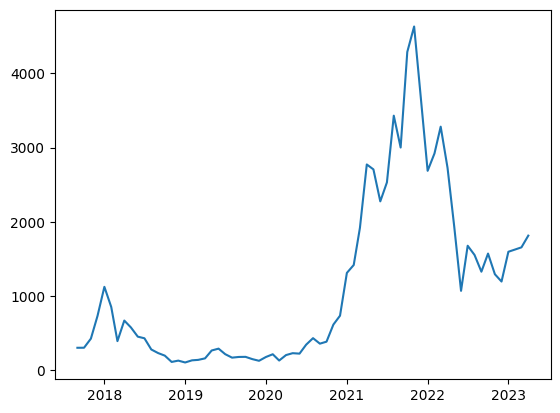

In [11]:
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.show()


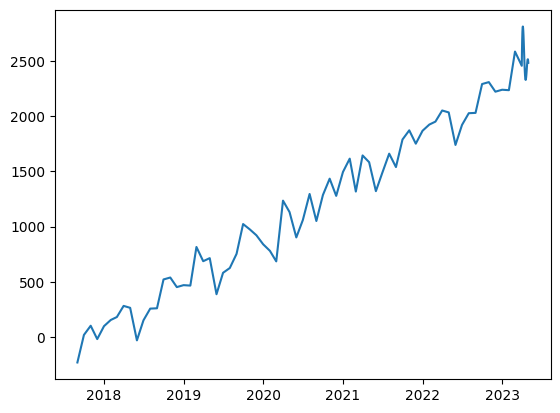

In [12]:
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'])
plt.show()
